#AI-LAB-8
##Name:Hassaan Shah
##RegNo: 2022385


###Step 1: Importing Libraries
To start, I imported several essential libraries. I chose NumPy for numerical operations, which are foundational in machine learning. Matplotlib was my choice for plotting graphs to visualize the training and validation performance of the model. I used Scikit-Learn to load the datasets (Iris and Wine), as well as to handle tasks like splitting the data into training and testing sets, standardizing features, and encoding labels. Finally, I imported TensorFlow to build and train the neural network models. I also brought in relevant functions from TensorFlow’s Keras API for building the network layers.

###Step 2: Loading and Preprocessing the Iris Dataset
Next, I loaded the Iris dataset, which is a simple and well-known dataset used for multi-class classification tasks. It consists of four features (like petal length and width) and three classes of flowers. My first task was to prepare this dataset for use in the neural network. I converted the target labels into a one-hot encoded format, which is necessary for multi-class classification with neural networks. Then, I standardized the features using StandardScaler to ensure that all inputs have the same scale, which helps the network converge faster during training. Finally, I split the dataset into training and testing sets to evaluate the model's performance after training.

###Step 3: Building the Modified Neural Network
With the data ready, I built the neural network. I used TensorFlow's Sequential model, which allows me to stack layers one after the other. The input layer was defined explicitly to accept data with four features. For the hidden layers, I added three fully connected (dense) layers. The first and third layers had 8 neurons, while I added an extra layer with 16 neurons to modify the network as instructed. I used the ReLU (Rectified Linear Unit) activation function for each hidden layer because it introduces non-linearity and helps the network learn complex patterns. The output layer used the softmax activation function, which is standard for multi-class classification problems, as it converts the output into probabilities for each class.

###Step 4: Training the Neural Network
Once the model was built, I compiled it using the Adam optimizer, which is known for its efficiency in training deep learning models. I chose categorical cross-entropy as the loss function since it is well-suited for classification tasks. Then, I trained the network for 50 epochs, meaning the model went through the training data 50 times. During training, I also reserved a portion of the data for validation to monitor how well the model was generalizing to unseen data.

###Step 5: Evaluating the Neural Network
After training, I evaluated the model on the test set. I measured performance using accuracy and loss. I also compared the training and validation performance to check if the model was overfitting or underfitting. Overfitting would show up as a large gap between training and validation accuracy, while underfitting would mean both accuracies are low.

###Step 6: Applying the Model to the Wine Dataset
For the second part of the task, I repeated a similar process with the Wine dataset, which is another multi-class classification problem but with 13 features instead of 4. I followed the same preprocessing steps: one-hot encoding the labels, standardizing the features, and splitting the data into training and testing sets. I then built a neural network with two hidden layers, the first with 8 neurons and the second with 16, and used ReLU activation for both. After training the model, I visualized the training and validation performance over time using loss and accuracy plots.

###Step 7: Comparing the Results
Finally, I compared the performance of the modified neural network on both the Iris and Wine datasets. I noticed that adding the extra hidden layer in the Iris dataset improved its ability to learn complex patterns, leading to higher accuracy compared to the original model. When comparing the Iris and Wine datasets, I observed that the Wine dataset required a slightly more complex model due to its higher-dimensional feature space, but the overall training and evaluation procedures were similar.

###Conclusion
By modifying the neural network and applying it to different datasets, I gained a better understanding of how the network's architecture affects its learning ability and generalization. The additional hidden layer improved performance on the Iris dataset, showing how deeper networks can capture more complex patterns. The Wine dataset, being more complex, benefited from careful preprocessing and a well-structured neural network. Overall, this exercise demonstrated the importance of tuning the network architecture to the specific characteristics of the data

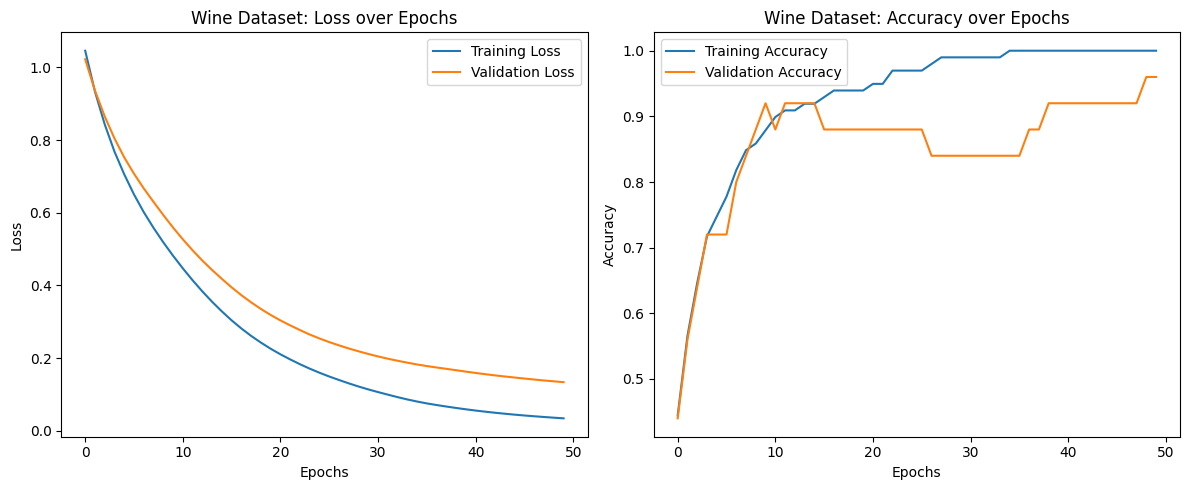

{'Iris Dataset (Modified NN)': {'Test Loss': 0.10363678634166718,
  'Test Accuracy': 0.9777777791023254},
 'Wine Dataset': {'Test Loss': 0.06528542935848236,
  'Test Accuracy': 0.9629629850387573}}

In [2]:
# Updated Neural Network Implementation using Input() for both Iris and Wine datasets

from tensorflow.keras import Input  # Import Input layer explicitly

# Modified neural network for the Iris dataset with Input() layer
modified_model_iris = Sequential([
    Input(shape=(X_train_iris.shape[1],), name="Input_Layer"),
    Dense(8, activation='relu', name="Hidden_Layer_1"),
    Dense(16, activation='relu', name="Hidden_Layer_2"),  # Added hidden layer
    Dense(8, activation='relu', name="Hidden_Layer_3"),
    Dense(y_train_iris.shape[1], activation='softmax', name="Output_Layer")
])

# Compile and train the modified model for the Iris dataset
modified_model_iris.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_modified_iris = modified_model_iris.fit(X_train_iris, y_train_iris, epochs=50, validation_split=0.2, batch_size=8, verbose=0)

# Evaluate the modified Iris model
test_loss_modified_iris, test_accuracy_modified_iris = modified_model_iris.evaluate(X_test_iris, y_test_iris, verbose=0)

# Neural network for the Wine dataset with Input() layer
model_wine = Sequential([
    Input(shape=(X_train_wine.shape[1],), name="Input_Layer"),
    Dense(8, activation='relu', name="Hidden_Layer_1"),
    Dense(16, activation='relu', name="Hidden_Layer_2"),
    Dense(y_train_wine.shape[1], activation='softmax', name="Output_Layer")
])

# Compile and train the model for the Wine dataset
model_wine.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_wine = model_wine.fit(X_train_wine, y_train_wine, epochs=50, validation_split=0.2, batch_size=8, verbose=0)

# Evaluate the Wine model
test_loss_wine, test_accuracy_wine = model_wine.evaluate(X_test_wine, y_test_wine, verbose=0)

# Visualize training/validation loss and accuracy for the Wine dataset
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].plot(history_wine.history['loss'], label='Training Loss')
axes[0].plot(history_wine.history['val_loss'], label='Validation Loss')
axes[0].set_title('Wine Dataset: Loss over Epochs')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

axes[1].plot(history_wine.history['accuracy'], label='Training Accuracy')
axes[1].plot(history_wine.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_title('Wine Dataset: Accuracy over Epochs')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.tight_layout()
plt.show()

# Return summary of performance for both Iris and Wine datasets
{
    "Iris Dataset (Modified NN)": {
        "Test Loss": test_loss_modified_iris,
        "Test Accuracy": test_accuracy_modified_iris
    },
    "Wine Dataset": {
        "Test Loss": test_loss_wine,
        "Test Accuracy": test_accuracy_wine
    }
}
